<h1 style='font-size:40px'>Limits & Derivatives </h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O limite consiste no valor máximo (limite) retornado por uma função conforme o valor de suas variáveis se aproxima de um número específico.
        </li>
    </ul>
</div>

In [12]:
# Um caso-base para o aprendizado de limite é calcular a inclinação da reta tangente à parábola (x^2) no ponto (1,1).
import pandas as pd
import numpy as np
i = 0
ms = pd.DataFrame({'x':[], 'm':[]})
for x in [3,2,1.5, 1.1, 1.01, 1.0001]:
    # Calculando a tangente.
    m = ((x ** 2) - 1) / (x - 1)
    ms.loc[i] = (x,m)
    i+=1
    
ms

,x,m
0,3.0000,4.0000
1,2.0000,3.0000
2,1.5000,2.5000
3,1.1000,2.1000
4,1.0100,2.0100
5,1.0001,2.0001


<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observe que quanto mais x se aproxima de 1 - o que faz com que &#8710;x fique perto de 0 - a tangente também passa a ter um valor cada vez mais próximo de 2.
        </li>
    </ul>
</div>

In [21]:
# Descobrindo a equação da tangente. 
from sympy import Eq, symbols, solve
x,y = symbols('x,y')
eq = Eq(2*(x-1),y-1)
solve(eq, y)

[2*x - 1]

Text(0.5, 10, 'Ponto de Tangência')

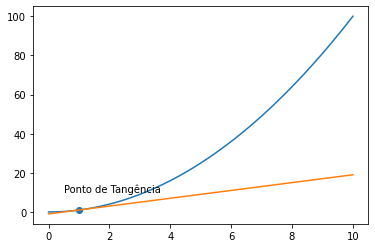

In [29]:
import matplotlib.pyplot as plt
x = np.linspace(0,10, 101)
y1 = x ** 2
y2 = 2*x -1

plt.plot(x, y1)
plt.plot(x,y2)
plt.scatter(1,1)
plt.text(0.5,10, 'Ponto de Tangência')

<h2 style='font-size:30px'> Exercícios página 87</h2>

a:
t=5; slope=-44.4
t=10; slope=-38.8
t=20; slope=-27.8
t=25; slope=-22.2
t=30; slope=-16.666666666666668


b: Tangente = -33.3


<AxesSubplot:>

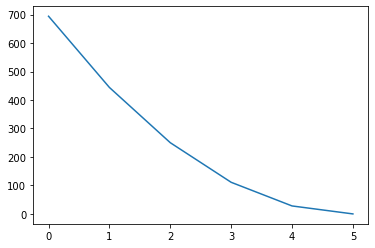

In [61]:
# 1.
tank = pd.DataFrame({'t (min)':[i*5 for i in range(1,7)],
                    'V (gal)':[694, 444, 250, 111, 28,0]})

# a.
xp = 15
yp = 250
print('a:')
for i in range(len(tank)):
    if i != 2:
        m = (tank.iloc[i,1] - yp) / (tank.iloc[i,0] - xp)
        print(f't={tank.iloc[i,0]}; slope={m}')
        
# b.
# Vamos calcular a média das inclinações quando t do ponto Q é 10 e 20.
t10 = (tank.iloc[1,1] - yp) / (tank.iloc[1,0] - xp)
t20 = (tank.iloc[3,1] - yp) / (tank.iloc[3,0] - xp)
print('\n')
print(f'b: Tangente = {(t10 + t20)/2}')

# c.
tank['V (gal)'].plot()

In [68]:
# 5.
# a.
print('a')
x = np.array([0.5, 0.1, 0.05, 0.01])
t = 2
height_i = 40 * t - 16 * (t**2)
for delta in x:
    time_elapsed = t + delta
    height_f = (40 * time_elapsed) - (16 * (time_elapsed**2))
    m = (height_f - height_i) / (delta)
    print(m)
    
print('\n')
# b.
delta = 10 ** -10
time_elapsed = t+delta
height_f = (40 * time_elapsed) - (16 * (time_elapsed **2))
m = (height_f - height_i) / delta
print(f'b: {m}')

a
-32.0
-25.600000000000023
-24.799999999999898
-24.159999999999116


b: -24.000001985768904


a:
x=2.0; m = 0.0
x=1.5; m = 1.7321
x=1.4; m = -1.0847
x=1.3; m = -2.7433
x=1.2; m = 4.3301
x=1.1; m = -2.8173
x=0.9; m = 3.4202
x=0.8; m = -5.0
x=0.7; m = -2.6061
x=0.6; m = -2.1651
x=0.5; m = 0.0

b:


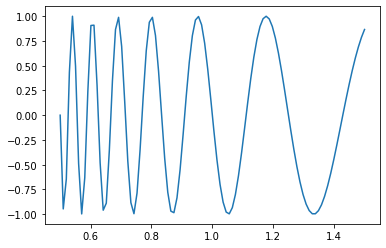


c:
-31.415946165998022


In [114]:
# 9.
px = 1
py = 0
ys = []
#a.
print('a:')
xs = sorted(np.array([i/10 for i in range(15, 4,-1) if i !=10] + [2]), reverse=True)
for x in xs:
    y = np.sin(10 * np.pi / x)
    # Colocando os y's e uma lista para agilizar a resolução do item b.
    ys.append(y)
    m = round((y - py) / (x - px),4)
    print(f'x={x}; m = {m}')

# As inclinações não estão chegando em um limite!
print('\nb:')
# b.
xs_b = np.linspace(0.5,1.5, 100)
ys_b = np.sin(10*np.pi / xs_b)
plt.plot(xs_b, ys_b)
plt.show()
# Pois ora o valor de y é maior do que 0, ora menor, o que faz com que a secante possa ter inclinações tanto positivas, quanto negativas.
print('\nc:')
# c.
delta = 10 ** -10
x = px +delta
y = np.sin(10*np.pi / x)
m = (y - py) / (x - px)
print(m)

<h2 style='font-size:30px'> The Limit of a Function</h2>
<div>
    <ul style='font-size:20px'> 
        <li>
            Vamos aprender um pouco sobre notações. Digamos que nós temos a função quadrática e quiséssemos saber qual valor ela retornará usando valores cada vez mais próximos de 2.
            $$
            f(x) = x^2 - x + 2
            $$
        </li>
    </ul>
</div>

In [121]:
# Vamos investigar isso.
deltas = np.array([1, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001])
for delta in deltas:
    x = 2+delta
    y = (x**2) - x +2
    print(y)
print('\n')   
for delta in -deltas:
    x = 2+delta
    y = (x**2) - x +2
    print(y)

8.0
5.75
4.8125
4.3100000000000005
4.030099999999999
4.003000999999999
4.00030001


2.0
2.75
3.3125
3.71
3.9701000000000004
3.9970010000000005
3.9997000099999998


<ul style='font-size:20px'> 
        <li>
            Note que quanto mais x se aproxima de 2, (seja pelo lado positivo, quanto pelo negativo) mais y fica próximo de 4. Portanto, podemos falar que, conforme a abscissa se aproxima de 2, a função alcança um valor limite de 4. Isso pode ser expresso, matematicamente, como:
            $$
            \lim_{x \to 2} (x^2 - x + 2) = 4
            $$
        </li>
    <li> 
        O uso dessa notação é bastante importante para funções com restrição de valores de abscissas.
    </li>
    </ul>

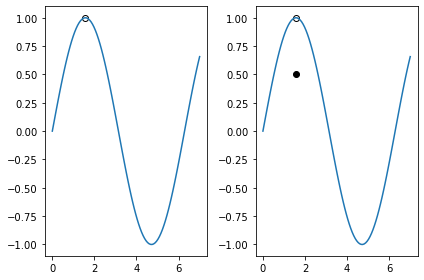

In [138]:
x = np.linspace(0,7, 100)
plt.subplot(121)
plt.plot(x,np.sin(x))
plt.scatter(np.pi/2,np.sin(np.pi/2), color='white', edgecolors='k')

plt.subplot(122)
plt.plot(x,np.sin(x))
plt.scatter(np.pi/2,np.sin(np.pi/2), color='white', edgecolors='k')
plt.scatter(np.pi/2,0.5, color='k', edgecolors='k')
plt.tight_layout()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            No caso dos dois gráficos acima (funções seno modificadas), mesmo que o valor da função quando x=90º não seja 1, não podemos negar que o seu limite conforme x se aproxima de 90 graus é 1.
            $$
            \lim_{x \to \pi/2} f(x) = 1
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example I</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de:$$\lim_{x \to 1} \frac{x-1}{x^2-1}$$
        </li>
    </ul>
</div>

Backwards:
0.0 --> 1.0
0.2 --> 0.8333333333333334
0.5 --> 0.6666666666666666
0.9 --> 0.5263157894736843
0.99 --> 0.5025125628140701
0.999 --> 0.5002501250625384

Forward:
2.0 --> 0.3333333333333333
1.5 --> 0.4
1.2 --> 0.4545454545454545
1.1 --> 0.47619047619047616
1.01 --> 0.49751243781094556
1.001 --> 0.4997501249375518
1.0001 --> 0.4999750012500894


<ipython-input-145-179efb64d18e>:18: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xs, (xs-1)/(xs**2-1))


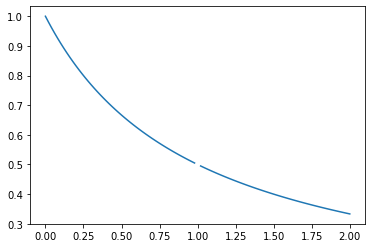

In [145]:
# Observe que não podemos ter x=1 por conta da divisão. Portanto, teremos que descobrir esse limite iterativamente.
backwards = np.array([0, 0.2, 0.5, 0.9, 0.99, 0.999])
forward = np.array([2, 1.5, 1.2, 1.1, 1.01, 1.001, 1.0001])


# Limite por trás.
print('Backwards:')
for number in backwards:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
print('\nForward:')
for number in forward:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
xs = np.linspace(0,2,101)
plt.plot(xs, (xs-1)/(xs**2-1))
plt.show()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observe que, tanto de trás pra frente, quanto de frente para trás, o valor limite alcançado é 0.5.
        </li>
    </ul>
</div>

Backwards:
0.0 --> 1.0
0.2 --> 0.8333333333333334
0.5 --> 0.6666666666666666
0.9 --> 0.5263157894736843
0.99 --> 0.5025125628140701
0.999 --> 0.5002501250625384

Forward:
2.0 --> 0.3333333333333333
1.5 --> 0.4
1.2 --> 0.4545454545454545
1.1 --> 0.47619047619047616
1.01 --> 0.49751243781094556
1.001 --> 0.4997501249375518
1.0001 --> 0.4999750012500894


<ipython-input-148-d3508f409541>:18: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xs, (xs-1)/(xs**2-1))


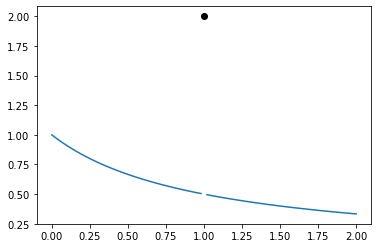

In [148]:
# Agora, se conferíssemos uma condição extra à função? Se x=1, y=2, por exemplo.
backwards = np.array([0, 0.2, 0.5, 0.9, 0.99, 0.999])
forward = np.array([2, 1.5, 1.2, 1.1, 1.01, 1.001, 1.0001])


# Limite por trás.
print('Backwards:')
for number in backwards:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
print('\nForward:')
for number in forward:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
xs = np.linspace(0,2,101)
plt.plot(xs, (xs-1)/(xs**2-1))
plt.scatter(1,2, color='k')
plt.show()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como o limite consiste em um valor que a função <strong> tendencia</strong> a ter, não podemos dizer que 2 é o resultado.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example II</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de:$$\lim_{t \to 0} \frac{\sqrt{t^2+9}-3}{t^2}$$
        </li>
    </ul>
</div>

In [167]:
# Novamente, essa função tem a restrição de que x!=0.
backwards=np.array([-2,-1,-0.5, -1e-1, -1e-2, -1e-3])
forward = -backwards

y_back = (np.sqrt((backwards**2)+9) - 3)/(backwards**2)
y_fwd = (np.sqrt((forward**2)+9) - 3)/(forward**2)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

# O limite, dessa maneira, é 0.167 (ou 1/6).

Backwards: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.16666666]
Forward: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.16666666]


In [168]:
# Mas se colocássemos um valor de t muito pequeno?
backwards=np.array([-2,-1,-0.5, -1e-1, -1e-2, -1e-10])
forward = -backwards

y_back = (np.sqrt((backwards**2)+9) - 3)/(backwards**2)
y_fwd = (np.sqrt((forward**2)+9) - 3)/(forward**2)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.        ]
Forward: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.        ]


<div> 
    <ul style='font-size:20px'> 
        <li> 
            Veja, com $10^{-10}$, o limite declarado é 0. Isso significa que o resultado deve ser 0, e não 1/6? Não, como o autor explicará na próxima seção.
        </li>
    </ul>
</div>

<p style='color:red'> Example III